<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Load-data-set" data-toc-modified-id="Load-data-set-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Load data set</a></span></li></ul></li><li><span><a href="#Consonant-Stats" data-toc-modified-id="Consonant-Stats-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Consonant Stats</a></span><ul class="toc-item"><li><span><a href="#Total-consonant-stats" data-toc-modified-id="Total-consonant-stats-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Total consonant stats</a></span></li><li><span><a href="#Words-with-consonant-stats" data-toc-modified-id="Words-with-consonant-stats-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Words with consonant stats</a></span></li><li><span><a href="#Treemap-graphs" data-toc-modified-id="Treemap-graphs-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Treemap graphs</a></span></li></ul></li><li><span><a href="#CV-Stats" data-toc-modified-id="CV-Stats-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CV Stats</a></span><ul class="toc-item"><li><span><a href="#Total-syllable-stats" data-toc-modified-id="Total-syllable-stats-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Total syllable stats</a></span></li><li><span><a href="#Words-with-syllable-stats" data-toc-modified-id="Words-with-syllable-stats-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Words with syllable stats</a></span></li><li><span><a href="#Treemap-graphs" data-toc-modified-id="Treemap-graphs-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Treemap graphs</a></span></li></ul></li></ul></div>

## Packages

In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import squarify

## Load data set

In [2]:
file_name = "PtLanka_compare.csv"

word_df = pd.read_csv(file_name)
word_df

,Unnamed: 0,SriLanka_creole,phonetic_transcription,Portuguese_definition,Portuguese_IPA,English_definition,pos,Related_languages,pt_related annotations,sources,original_full_entry,original_Portuguese_definition,original_linguistic_notes,page
0,0,Abaço,abaso,abaixo,ɐ.ˈbaj.ʃu,below,adverb,NaN,NaN,NaN,"Abaço, abaixo. P. us. V.",abaixo,pouco usado,135.0
1,1,Aberçà,abeɾsaː,abraçar,ɐ.bɾɐ.ˈsaɾ,hug,verb,NaN,NaN,"O Bruffador, ii periódico","Aberçà, abersà, aburçá {Br. 2), abraçar.",abraçar,NaN,135.0
2,2,abersà,abeɾsaː,abraçar,ɐ.bɾɐ.ˈsaɾ,hug,verb,NaN,NaN,"O Bruffador, ii periódico","Aberçà, abersà, aburçá {Br. 2), abraçar.",abraçar,NaN,135.0
3,3,aburçá,abuɾsaː,abraçar,ɐ.bɾɐ.ˈsaɾ,hug,verb,NaN,NaN,"O Bruffador, ii periódico","Aberçà, abersà, aburçá {Br. 2), abraçar.",abraçar,NaN,135.0
4,4,Aburcé,abuɾseː,aborrecer,ɐ.bu.Rɨ.ˈseɾ,annoy,verb,NaN,NaN,NaN,Aburcé. Mais us. burcé.,Mesmo que burcé,NaN,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,2499,Virrá,ʋiraː,virar,vi.ˈɾaɾ,turn around,verb,NaN,NaN,"O Bruffador, i periódico","Virrà {Br. i), virar. Cfr. tirrá, parra.",virar,NaN,181.0
970,2501,Vistê,ʋisteː,vestir,vɨʃ.ˈtiɾ,dress,verb,NaN,NaN,"O Bruffador, ii periódico","Viste, vista {Br. 2), vestir (t. us.). Visteme...",vestir,NaN,181.0
971,2502,vistá,ʋistaː,vestir,vɨʃ.ˈtiɾ,dress,verb,NaN,NaN,"O Bruffador, ii periódico","Viste, vista {Br. 2), vestir (t. us.). Visteme...",vestir,NaN,181.0
972,2507,Vizia,ʋizia,vigia,vi.ˈʒi.ɐ,watchman,verb,NaN,NaN,NaN,"Vizia, vigia. Viziá, vigiar.",vigia,NaN,182.0


In [3]:
word_list = list(word_df["phonetic_transcription"])
word_list = [" ".join(list(str(i))) for i in word_list]
word_list

['a b a s o',
 'a b e ɾ s a ː',
 'a b e ɾ s a ː',
 'a b u ɾ s a ː',
 'a b u ɾ s e ː',
 'a b o ɾ s i d o',
 'a b s e n s a',
 'a k a ː',
 'a s o ɾ a g e',
 'a d e ː o',
 'a d i o ː t o',
 'a d u l t e ː ɾ i a',
 'a d u l t e ɾ a s a ː o',
 'a f e s a n',
 'a ː g o ː',
 'a g ɾ a d a d o',
 'a g u a ː',
 'a g u ʋ a ː',
 'a i n d e ː',
 'a l b ɾ e',
 'a ː l b ɾ i',
 'a ː l b i ɾ',
 'a l d i a',
 'a l e g ɾ a d o',
 'a l e g ɾ o z o',
 'a l f a d a',
 'a l f a ː n d a g o',
 'a l f i a t o',
 'a ʎ u m a',
 'a l a g ɾ e',
 'a l a g ɾ o z o',
 'a l e g ɾ i o z o',
 'a l a g ɾ i a',
 'a l e g ɾ i',
 'a l m a ː ɾ i',
 'a l m a z e m',
 'a l m o ː s a',
 'a l u m a d o',
 'a l u m i n a ː',
 'a l ʋ e ɾ s a ː o',
 'a l ʋ o ɾ s a ː',
 'a l ʋ e ɾ s a ː',
 'a l ʋ o ɾ o s a ː o',
 'a l ʋ ɾ o s o',
 'a m a ɲ a ː o',
 'a m i ɲ a ː o',
 'a m i a ː o',
 'a m i a m',
 'a m a ɾ o z o',
 'a m e ɾ o z o',
 'a m o ɾ o',
 'a m i s a n',
 'a m p e ː ɾ',
 'a n e l a',
 'a n i m a',
 'a n k e ɾ a ː',
 'a n k ɾ a 

# Consonant Stats

In [4]:
word_list = [re.sub("(?<=[aeiout]) ː", "ː", i) for i in word_list]
word_list = [re.sub("(?<=[nl]) ʲ", "ʲ", i) for i in word_list]
word_list = [re.sub("d ̠ ʒ", "d̠ʒ", i) for i in word_list]
word_list = [re.sub("t ̠ ʃ", "t̠ʃ", i) for i in word_list]
word_list = [re.sub("^", " ", i) for i in word_list]
word_list = [re.sub("$", " ", i) for i in word_list]

word_list[0:10]

[' a b a s o ',
 ' a b e ɾ s aː ',
 ' a b e ɾ s aː ',
 ' a b u ɾ s aː ',
 ' a b u ɾ s eː ',
 ' a b o ɾ s i d o ',
 ' a b s e n s a ',
 ' a k aː ',
 ' a s o ɾ a g e ',
 ' a d eː o ']

In [5]:
word_list_split = [i.split(" ") for i in word_list]
word_list_split = [item for sublist in word_list_split for item in sublist]
word_list_split = [x for x in word_list_split if x]
vowel_punct = ["a","aː","e","eː","i","iː","o","oː","u","uː","ə","-"]
word_list_split = [e for e in word_list_split if e not in vowel_punct]

## Total consonant stats

In [6]:
counts = Counter(word_list_split)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ["IPA", "count"]
df = df.sort_values(by=["count"],ascending=False).reset_index(drop=True)
df

,IPA,count
0,ɾ,485
1,s,389
2,d,322
3,n,316
4,t,273
5,m,233
6,p,206
7,k,201
8,l,159
9,ʋ,129


## Words with consonant stats

In [7]:
IPA_list = list(df["IPA"])
in_word_list = []
for word in IPA_list:
    word_search = " "+ word + " "
    matches = len([match for match in word_list if word_search in match])
    in_word_list.append(matches)
df["word_count"] = in_word_list
df["IPA_count_label"] = df["IPA"] + " : " + df["count"].astype(str)
df["IPA_word_count_label"] = df["IPA"] + " : " + df["word_count"].astype(str)
df

,IPA,count,word_count,IPA_count_label,IPA_word_count_label
0,ɾ,485,453,ɾ : 485,ɾ : 453
1,s,389,348,s : 389,s : 348
2,d,322,275,d : 322,d : 275
3,n,316,285,n : 316,n : 285
4,t,273,253,t : 273,t : 253
5,m,233,224,m : 233,m : 224
6,p,206,198,p : 206,p : 198
7,k,201,199,k : 201,k : 199
8,l,159,158,l : 159,l : 158
9,ʋ,129,129,ʋ : 129,ʋ : 129


## Treemap graphs

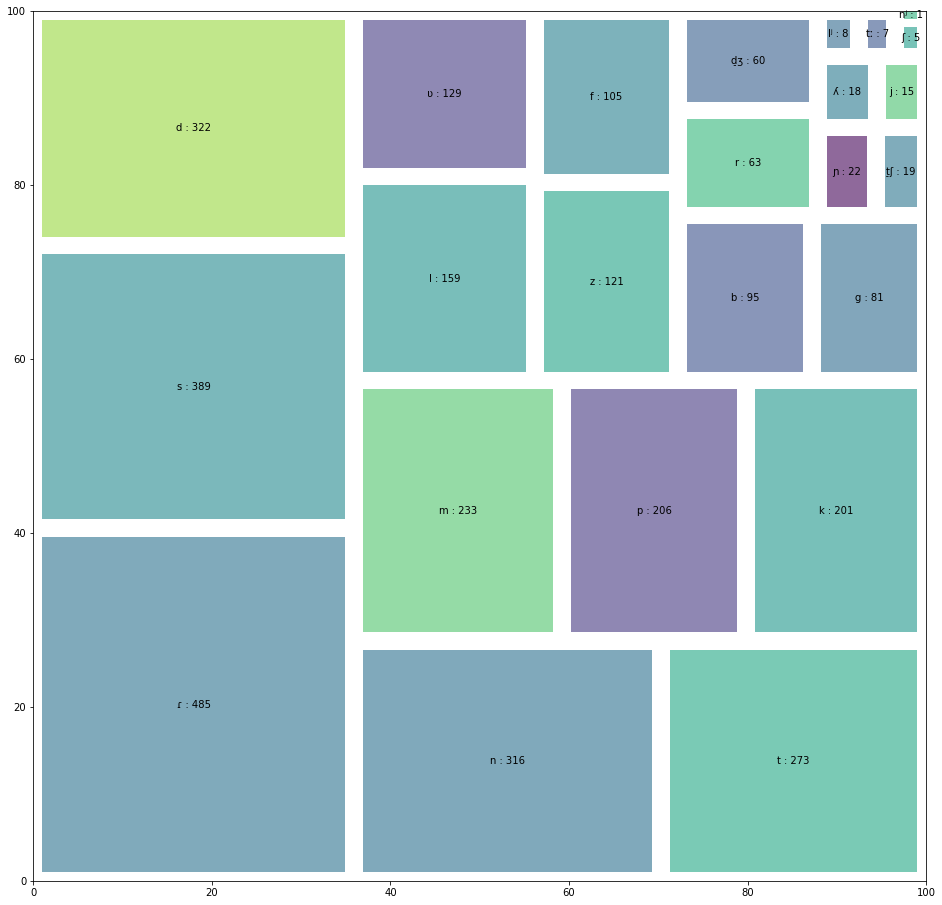

In [8]:
labels = list(df["IPA_count_label"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

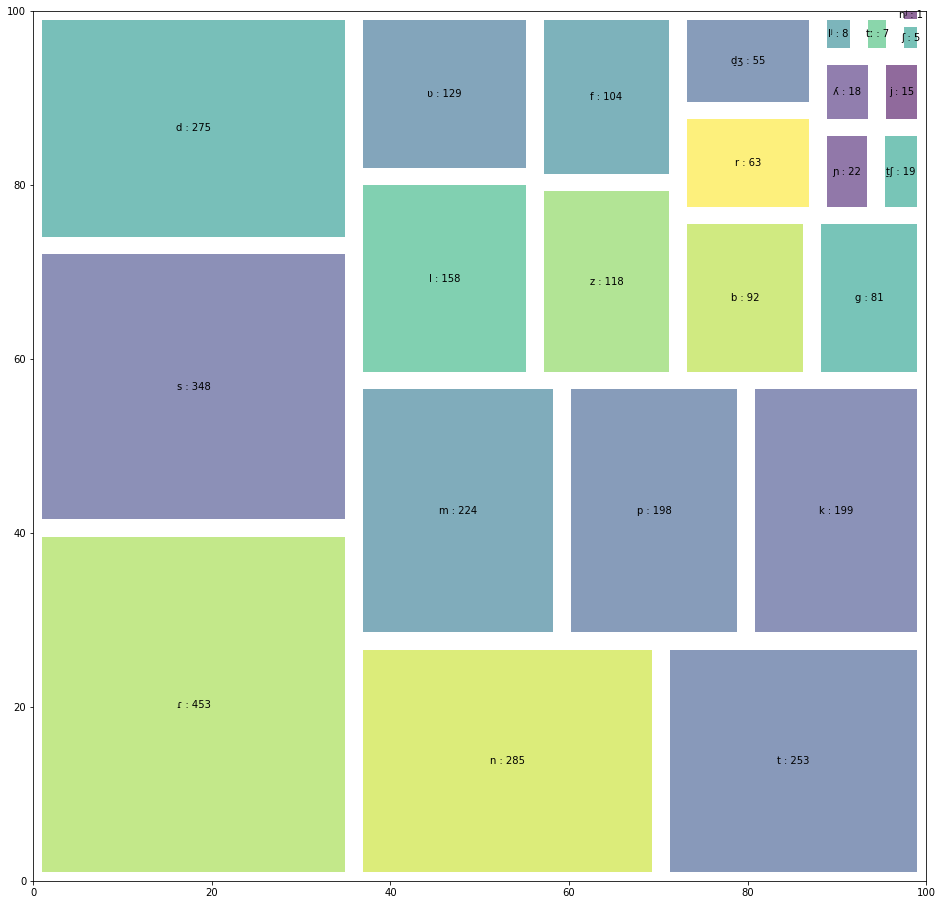

In [9]:
labels = list(df["IPA_word_count_label"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

# CV Stats

## Load dataset

In [10]:
file_name = "crioulo_IPA_CV_compare.csv"

word_df = pd.read_csv(file_name)
word_df

,SriLanka_creole,phonetic_transcription,phono_TRSVD,phono_CV
0,Abaço,abaso,V.TV.SV,V.CV.CV
1,Aberçà,abeɾsaː,V.TVR.SV,V.CVC.CV
2,abersà,abeɾsaː,V.TVR.SV,V.CVC.CV
3,aburçá,abuɾsaː,V.TVR.SV,V.CVC.CV
4,Aburcé,abuɾseː,V.TVR.SV,V.CVC.CV
...,...,...,...,...
969,Virrá,ʋiraː,TV.RV,CV.CV
970,Vistê,ʋisteː,TVS.TV,CVC.CV
971,vistá,ʋistaː,TVS.TV,CVC.CV
972,Vizia,ʋizia,TV.SV.V,CV.CV.V


In [11]:
word_list_CV = list(word_df["phono_CV"])
word_list_split = [i.split(".") for i in word_list_CV]
word_list_split = [item for sublist in word_list_split for item in sublist]
word_list_split = [i.split(" ") for i in word_list_split]
word_list_split = [item for sublist in word_list_split for item in sublist]
word_list_split[:] = [x for x in word_list_split if x]

## Total syllable stats

In [12]:
counts = Counter(word_list_split)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ["CV", "count"]
df = df.sort_values(by=["count"],ascending=False).reset_index(drop=True)
df

,CV,count
0,CV,1680
1,CVC,468
2,V,323
3,CCV,165
4,VC,83
5,CVG,47
6,CVCV,41
7,CCVC,39
8,C,8
9,VG,7


## Words with syllable stats

In [13]:
word_list_CV = [re.sub("\.", " ", i) for i in word_list_CV]
word_list_CV = [re.sub("^", " ", i) for i in word_list_CV]
word_list_CV = [re.sub("$", " ", i) for i in word_list_CV]

In [14]:
CV_list = list(df["CV"])
in_word_list = []
for word in CV_list:
    word_search = " "+ word + " "
    matches = len([match for match in word_list_CV if word_search in match])
    in_word_list.append(matches)
df["word_count"] = in_word_list
df["word_count"] = in_word_list
df["CV_count_label"] = df["CV"] + " : " + df["count"].astype(str)
df["CV_word_count_label"] = df["CV"] + " : " + df["word_count"].astype(str)
df

,CV,count,word_count,CV_count_label,CV_word_count_label
0,CV,1680,893,CV : 1680,CV : 893
1,CVC,468,400,CVC : 468,CVC : 400
2,V,323,289,V : 323,V : 289
3,CCV,165,164,CCV : 165,CCV : 164
4,VC,83,82,VC : 83,VC : 82
5,CVG,47,46,CVG : 47,CVG : 46
6,CVCV,41,41,CVCV : 41,CVCV : 41
7,CCVC,39,39,CCVC : 39,CCVC : 39
8,C,8,8,C : 8,C : 8
9,VG,7,7,VG : 7,VG : 7


## Treemap graphs

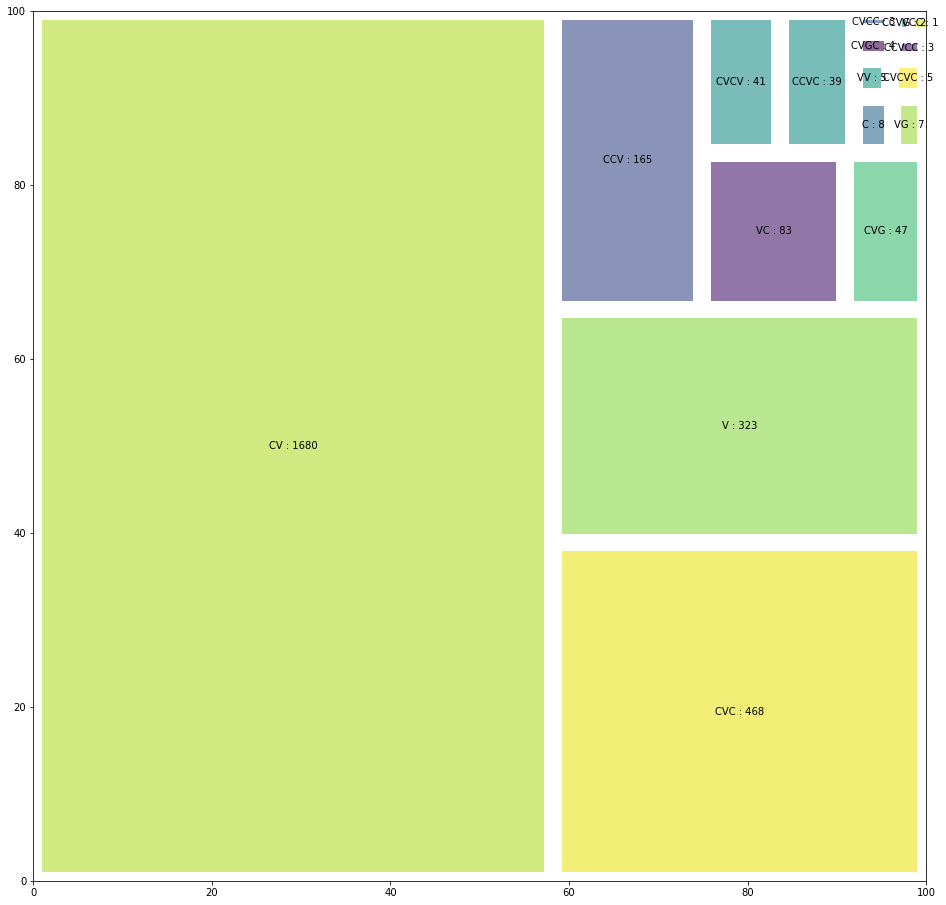

In [15]:
labels = list(df["CV_count_label"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

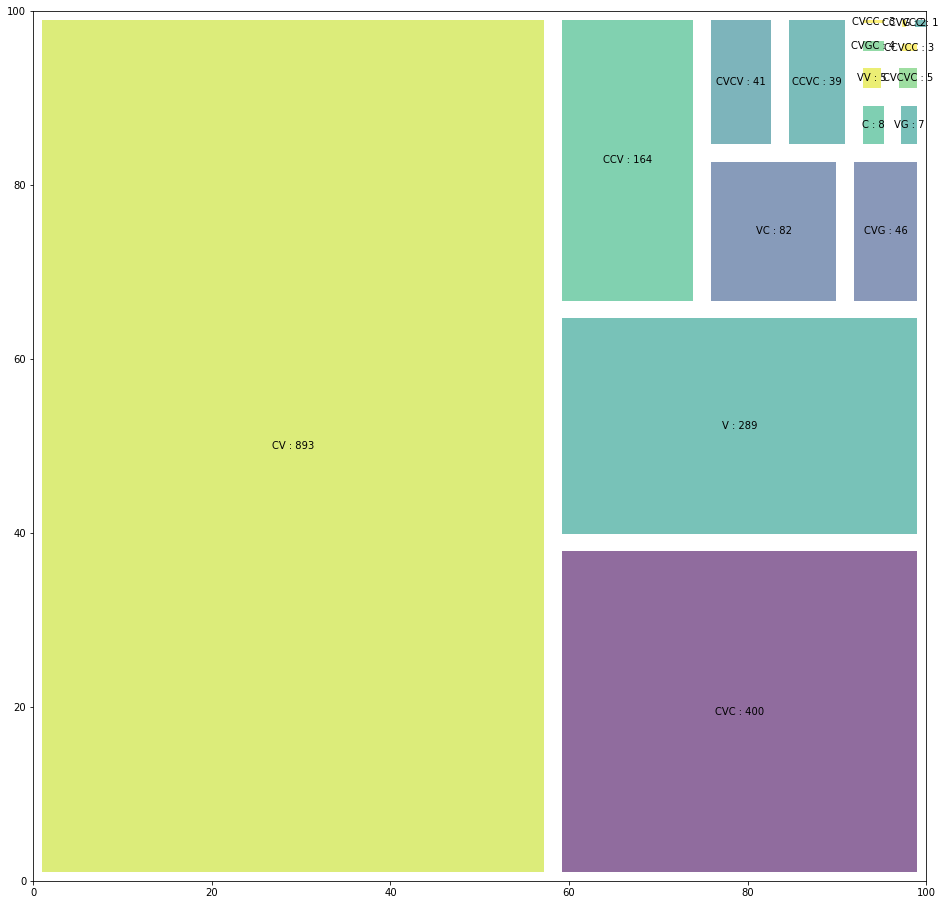

In [16]:
labels = list(df["CV_word_count_label"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

In [17]:
word_df[word_df['phono_CV']=="C"]

,SriLanka_creole,phonetic_transcription,phono_TRSVD,phono_CV


In [18]:
word_df.to_csv("PhonoCV_Lanka.csv", index = False, header = True)
word_df

,SriLanka_creole,phonetic_transcription,phono_TRSVD,phono_CV
0,Abaço,abaso,V.TV.SV,V.CV.CV
1,Aberçà,abeɾsaː,V.TVR.SV,V.CVC.CV
2,abersà,abeɾsaː,V.TVR.SV,V.CVC.CV
3,aburçá,abuɾsaː,V.TVR.SV,V.CVC.CV
4,Aburcé,abuɾseː,V.TVR.SV,V.CVC.CV
...,...,...,...,...
969,Virrá,ʋiraː,TV.RV,CV.CV
970,Vistê,ʋisteː,TVS.TV,CVC.CV
971,vistá,ʋistaː,TVS.TV,CVC.CV
972,Vizia,ʋizia,TV.SV.V,CV.CV.V


In [19]:
word_df_pt = pd.read_csv("PhonoCV_Pt.csv")
#word_df_pt = word_df_pt[["SriLanka_creole","phono_CV"]]
word_df_pt.columns = ["SriLanka_creole","Portuguese_definition","Portuguese_IPA", "phono_CV_pt"]
word_df_pt

,SriLanka_creole,Portuguese_definition,Portuguese_IPA,phono_CV_pt
0,Abaço,abaixo,ɐ.ˈbaj.ʃu,V.CVC.CV
1,Aberçà,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC
2,abersà,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC
3,aburçá,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC
4,Aburcé,aborrecer,ɐ.bu.Rɨ.ˈseɾ,V.CV.CV.CVC
...,...,...,...,...
969,Virrá,virar,vi.ˈɾaɾ,CV.CVC
970,Vistê,vestir,vɨʃ.ˈtiɾ,CVC.CVC
971,vistá,vestir,vɨʃ.ˈtiɾ,CVC.CVC
972,Vizia,vigia,vi.ˈʒi.ɐ,CV.CV.V


In [20]:
word_df = pd.merge(word_df, word_df_pt, on="SriLanka_creole", how='inner')

In [21]:
word_df

,SriLanka_creole,phonetic_transcription,phono_TRSVD,phono_CV,Portuguese_definition,Portuguese_IPA,phono_CV_pt
0,Abaço,abaso,V.TV.SV,V.CV.CV,abaixo,ɐ.ˈbaj.ʃu,V.CVC.CV
1,Aberçà,abeɾsaː,V.TVR.SV,V.CVC.CV,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC
2,abersà,abeɾsaː,V.TVR.SV,V.CVC.CV,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC
3,aburçá,abuɾsaː,V.TVR.SV,V.CVC.CV,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC
4,Aburcé,abuɾseː,V.TVR.SV,V.CVC.CV,aborrecer,ɐ.bu.Rɨ.ˈseɾ,V.CV.CV.CVC
...,...,...,...,...,...,...,...
975,Virrá,ʋiraː,TV.RV,CV.CV,virar,vi.ˈɾaɾ,CV.CVC
976,Vistê,ʋisteː,TVS.TV,CVC.CV,vestir,vɨʃ.ˈtiɾ,CVC.CVC
977,vistá,ʋistaː,TVS.TV,CVC.CV,vestir,vɨʃ.ˈtiɾ,CVC.CVC
978,Vizia,ʋizia,TV.SV.V,CV.CV.V,vigia,vi.ˈʒi.ɐ,CV.CV.V


In [22]:
changes_df = word_df[word_df.phono_CV != word_df.phono_CV_pt]
changes_df

,SriLanka_creole,phonetic_transcription,phono_TRSVD,phono_CV,Portuguese_definition,Portuguese_IPA,phono_CV_pt
0,Abaço,abaso,V.TV.SV,V.CV.CV,abaixo,ɐ.ˈbaj.ʃu,V.CVC.CV
1,Aberçà,abeɾsaː,V.TVR.SV,V.CVC.CV,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC
2,abersà,abeɾsaː,V.TVR.SV,V.CVC.CV,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC
3,aburçá,abuɾsaː,V.TVR.SV,V.CVC.CV,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC
4,Aburcé,abuɾseː,V.TVR.SV,V.CVC.CV,aborrecer,ɐ.bu.Rɨ.ˈseɾ,V.CV.CV.CVC
...,...,...,...,...,...,...,...
974,vintroso,ʋintɾozo,TVR.TRV.SV,CVC.CCV.CV,venturoso,vẽ.tu.ˈɾo.zu,CV.CV.CV.CV
975,Virrá,ʋiraː,TV.RV,CV.CV,virar,vi.ˈɾaɾ,CV.CVC
976,Vistê,ʋisteː,TVS.TV,CVC.CV,vestir,vɨʃ.ˈtiɾ,CVC.CVC
977,vistá,ʋistaː,TVS.TV,CVC.CV,vestir,vɨʃ.ˈtiɾ,CVC.CVC


In [24]:
changes_df['phono_CV_S'] = changes_df['phono_CV'].str.replace('[CV]','')
changes_df

C:\Users\CARLOS~1\AppData\Local\Temp/ipykernel_4432/3672125568.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  changes_df['phono_CV_S'] = changes_df['phono_CV'].str.replace('[CV]','')
C:\Users\CARLOS~1\AppData\Local\Temp/ipykernel_4432/3672125568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes_df['phono_CV_S'] = changes_df['phono_CV'].str.replace('[CV]','')


,SriLanka_creole,phonetic_transcription,phono_TRSVD,phono_CV,Portuguese_definition,Portuguese_IPA,phono_CV_pt,phono_CV_S
0,Abaço,abaso,V.TV.SV,V.CV.CV,abaixo,ɐ.ˈbaj.ʃu,V.CVC.CV,..
1,Aberçà,abeɾsaː,V.TVR.SV,V.CVC.CV,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC,..
2,abersà,abeɾsaː,V.TVR.SV,V.CVC.CV,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC,..
3,aburçá,abuɾsaː,V.TVR.SV,V.CVC.CV,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC,..
4,Aburcé,abuɾseː,V.TVR.SV,V.CVC.CV,aborrecer,ɐ.bu.Rɨ.ˈseɾ,V.CV.CV.CVC,..
...,...,...,...,...,...,...,...,...
974,vintroso,ʋintɾozo,TVR.TRV.SV,CVC.CCV.CV,venturoso,vẽ.tu.ˈɾo.zu,CV.CV.CV.CV,..
975,Virrá,ʋiraː,TV.RV,CV.CV,virar,vi.ˈɾaɾ,CV.CVC,.
976,Vistê,ʋisteː,TVS.TV,CVC.CV,vestir,vɨʃ.ˈtiɾ,CVC.CVC,.
977,vistá,ʋistaː,TVS.TV,CVC.CV,vestir,vɨʃ.ˈtiɾ,CVC.CVC,.


In [26]:
changes_df['phono_CV_S'] = changes_df['phono_CV_S'].str.len()+1
changes_df

C:\Users\CARLOS~1\AppData\Local\Temp/ipykernel_4432/1274634229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes_df['phono_CV_S'] = changes_df['phono_CV_S'].str.len()+1


,SriLanka_creole,phonetic_transcription,phono_TRSVD,phono_CV,Portuguese_definition,Portuguese_IPA,phono_CV_pt,phono_CV_S
0,Abaço,abaso,V.TV.SV,V.CV.CV,abaixo,ɐ.ˈbaj.ʃu,V.CVC.CV,3
1,Aberçà,abeɾsaː,V.TVR.SV,V.CVC.CV,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC,3
2,abersà,abeɾsaː,V.TVR.SV,V.CVC.CV,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC,3
3,aburçá,abuɾsaː,V.TVR.SV,V.CVC.CV,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC,3
4,Aburcé,abuɾseː,V.TVR.SV,V.CVC.CV,aborrecer,ɐ.bu.Rɨ.ˈseɾ,V.CV.CV.CVC,3
...,...,...,...,...,...,...,...,...
974,vintroso,ʋintɾozo,TVR.TRV.SV,CVC.CCV.CV,venturoso,vẽ.tu.ˈɾo.zu,CV.CV.CV.CV,3
975,Virrá,ʋiraː,TV.RV,CV.CV,virar,vi.ˈɾaɾ,CV.CVC,2
976,Vistê,ʋisteː,TVS.TV,CVC.CV,vestir,vɨʃ.ˈtiɾ,CVC.CVC,2
977,vistá,ʋistaː,TVS.TV,CVC.CV,vestir,vɨʃ.ˈtiɾ,CVC.CVC,2


In [28]:
changes_df['phono_CV_pt_S'] = changes_df['phono_CV_pt'].str.replace('[CV]','')

changes_df['phono_CV_pt_S'] = changes_df['phono_CV_pt_S'].str.len()+1
changes_df

C:\Users\CARLOS~1\AppData\Local\Temp/ipykernel_4432/3284417183.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  changes_df['phono_CV_pt_S'] = changes_df['phono_CV_pt'].str.replace('[CV]','')
C:\Users\CARLOS~1\AppData\Local\Temp/ipykernel_4432/3284417183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes_df['phono_CV_pt_S'] = changes_df['phono_CV_pt'].str.replace('[CV]','')
C:\Users\CARLOS~1\AppData\Local\Temp/ipykernel_4432/3284417183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,SriLanka_creole,phonetic_transcription,phono_TRSVD,phono_CV,Portuguese_definition,Portuguese_IPA,phono_CV_pt,phono_CV_S,phono_CV_pt_S
0,Abaço,abaso,V.TV.SV,V.CV.CV,abaixo,ɐ.ˈbaj.ʃu,V.CVC.CV,3,3
1,Aberçà,abeɾsaː,V.TVR.SV,V.CVC.CV,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC,3,3
2,abersà,abeɾsaː,V.TVR.SV,V.CVC.CV,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC,3,3
3,aburçá,abuɾsaː,V.TVR.SV,V.CVC.CV,abraçar,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC,3,3
4,Aburcé,abuɾseː,V.TVR.SV,V.CVC.CV,aborrecer,ɐ.bu.Rɨ.ˈseɾ,V.CV.CV.CVC,3,4
...,...,...,...,...,...,...,...,...,...
974,vintroso,ʋintɾozo,TVR.TRV.SV,CVC.CCV.CV,venturoso,vẽ.tu.ˈɾo.zu,CV.CV.CV.CV,3,4
975,Virrá,ʋiraː,TV.RV,CV.CV,virar,vi.ˈɾaɾ,CV.CVC,2,2
976,Vistê,ʋisteː,TVS.TV,CVC.CV,vestir,vɨʃ.ˈtiɾ,CVC.CVC,2,2
977,vistá,ʋistaː,TVS.TV,CVC.CV,vestir,vɨʃ.ˈtiɾ,CVC.CVC,2,2


In [31]:
changes_df = changes_df[changes_df.phono_CV_S != changes_df.phono_CV_pt_S]
changes_df

,SriLanka_creole,phonetic_transcription,phono_TRSVD,phono_CV,Portuguese_definition,Portuguese_IPA,phono_CV_pt,phono_CV_S,phono_CV_pt_S
4,Aburcé,abuɾseː,V.TVR.SV,V.CVC.CV,aborrecer,ɐ.bu.Rɨ.ˈseɾ,V.CV.CV.CVC,3,4
5,Aborcido,aboɾsido,V.TVR.SV.TV,V.CVC.CV.CV,aborrecido,ɐ.bu.Rɨ.ˈsi.du,V.CV.CV.CV.CV,4,5
7,Acá,akaː,V.TV,V.CV,cá,ˈka,CV,2,1
10,Adiôto,adioːto,V.TV.V.TV,V.CV.V.CV,douto,ˈdow.tu,CVG.CV,4,3
12,adulteração,adulteɾasaːo,V.TVR.TV.RV.SV.V,V.CVC.CV.CV.CV.V,adultério,ɐ.duɫ.tˈɛ.ɾi.u,V.CVC.CV.CV.V,6,5
...,...,...,...,...,...,...,...,...,...
965,Verdedeiro,ʋeɾdedeiɾo,TVR.TV.TVG.RV,CVC.CV.CVG.CV,verdadeiro,vɨɾ.dɐ.ˈdɐj.ɾu,CVC.CV.CVC.CV,5,4
966,Vésper,ʋeːspeɾ,TVS.TVR,CVC.CVC,véspera,ˈvɛʃ.pɨ.ɾɐ,CVC.CV.CV,2,3
967,Vido,ʋido,TV.TV,CV.CV,ver,ˈveɾ,CVC,2,1
969,Vigil,ʋid̠ʒil,TV.TVR,CV.CVC,vigília,vi.ˈʒi.ljɐ,CV.CV.CCV,2,3


In [ ]:
changes_df.to_csv("changes_CV.csv", index = False, header = True)